# Natural Language Processing

## Importing the libraries

In [1]:
from google.colab import files

In [ ]:
files.upload()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

## Importing the dataset

In [5]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

## **NAIVE BAYES MODEL**

## Cleaning the texts

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    stop_words = stopwords.words('english')
    stop_words.remove('not')
    review = [ps.stem(word) for word in review if not word in set(stop_words)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Creating the Bag of Words model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 205)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

# Splitting the dataset into Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 46)

## Training the Naive Bayes model on the Training set

In [14]:
# demonstrates the use of scikit-learn to train Multi-NomialMB classifier on your text data and evaluate its performance us
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train the model using the training set
best_model = None
best_test_accuracy = 0
alpha = 0
for i in [float(x) / 10 for x in range(1, 11)]:

  # Define the model
  classifier =MultinomialNB(alpha = i)

  # fit the model
  classifier.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = classifier.predict(X_test)

  # finding test accuracy of the model
  test_accuracy = accuracy_score(y_test, y_pred) * 100
  if test_accuracy > best_test_accuracy:
    best_test_accuracy = test_accuracy
    alpha = i
    best_model = classifier
  print("for alpha = {} model accuracy is {:.2f}%".format(i, test_accuracy))

for alpha = 0.1 model accuracy is 79.50%
for alpha = 0.2 model accuracy is 79.00%
for alpha = 0.3 model accuracy is 79.00%
for alpha = 0.4 model accuracy is 79.00%
for alpha = 0.5 model accuracy is 79.00%
for alpha = 0.6 model accuracy is 79.50%
for alpha = 0.7 model accuracy is 81.00%
for alpha = 0.8 model accuracy is 81.50%
for alpha = 0.9 model accuracy is 81.50%
for alpha = 1.0 model accuracy is 81.50%


# predicting Test and Train set

In [15]:
# Make predictions on the training set
y_train_pred = best_model.predict(X_train)

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
# confusion matrix of y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# confusion matrix of y_train and y_train_pred
cm_train = confusion_matrix(y_train, y_train_pred)

# finding test accuracy
test_accuracy = accuracy_score(y_test, y_pred)*100

# finding train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)*100

# finding precision score of the model
precision = precision_score(y_test, y_pred)*100

# finding recall score of the model
recall = recall_score(y_test, y_pred)* 100
print("confusion matrix for training set:\n", cm_train)
print("confusion matrix for testing set:\n", cm)
print("training data accuracy: {:.2f}%:".format(train_accuracy))
print("testing data accuracy: {:.2f}%".format(test_accuracy))
print("precision score: {:.2f}%".format(precision))
print("recall score: {:.2f}%".format(recall))
print("difference: {:.2f}%".format(train_accuracy - test_accuracy))


confusion matrix for training set:
 [[353  53]
 [ 83 311]]
confusion matrix for testing set:
 [[77 17]
 [20 86]]
training data accuracy: 83.00%:
testing data accuracy: 81.50%
precision score: 83.50%
recall score: 81.13%
difference: 1.50%


# Predicting unseen data

In [17]:
# predicting new unseen data
new_review = 'not that good'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = best_model.predict(new_X_test)
print(new_y_pred)

[0]


# Visualization

Text(45.722222222222214, 0.5, 'actual value')

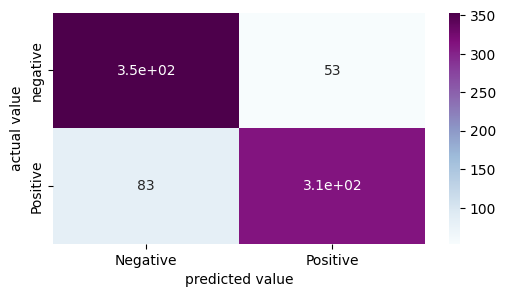

In [ ]:
# ploting the confusion matrix of training data
plt.figure(figsize = (6, 3))
sns.heatmap(cm_train, annot = True, cmap = "BuPu", xticklabels = ['Negative', 'Positive'], yticklabels = ['negative', 'Positive'])
plt.xlabel('predicted value')
plt.ylabel('actual value')

Text(45.722222222222214, 0.5, 'actual value')

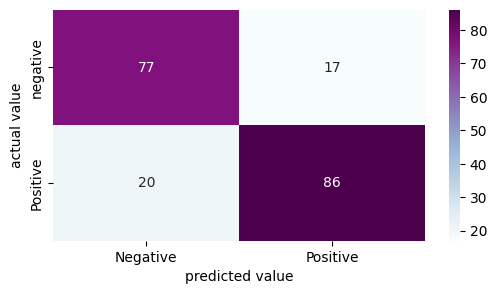

In [ ]:
# plotting confusion matrix of test data
plt.figure(figsize = (6, 3))
sns.heatmap(cm, annot = True, cmap = "BuPu", xticklabels = ['Negative', 'Positive'], yticklabels = ['negative', 'Positive'])
plt.xlabel('predicted value')
plt.ylabel('actual value')


## **SVC** **MODEL**

# Cleaning the data

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    stop_words = stopwords.words('english')
    review = [ps.stem(word) for word in review if not word in set(stop_words)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Creating the bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 100)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

# Training the svc model on training set

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
# Define the model

model = SVC()

# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best model obtained from GridSearchCV
model = grid_search.best_estimator_

# Train the model using the training set
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate the testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
# Print the training and testing accuracies
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {testing_accuracy * 100:.2f}%")
print(f"Precision score: {precision*100:.2f}%")
print(f"recall score: {recall*100:.2f}%")

Training Accuracy: 81.38%
Testing Accuracy: 78.00%
Precision score: 80.00%
recall score: 69.57%


In [ ]:
# Preprocess the new review
new_review = 'I love this place'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if word not in set(all_stopwords)]
new_review = ' '.join(new_review)

# Vectorize the new review using the same CountVectorizer used during training
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()

# Predict sentiment using the trained model
new_y_pred = model.predict(new_X_test)
print(new_y_pred)

[1]


## **K-NEAREST NEIGHBOR MODEL**

# Cleaning the data

In [18]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    stop_words = stopwords.words('english')
    review = [ps.stem(word) for word in review if not word in set(stop_words)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Creating the bag of words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 200)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

# Training the K-Nearest Neighbor on Training set

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier = GaussianNB()
k_folds = 5  # You can adjust the number of folds
CV = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize variables to store best model and its corresponding scores
best_model = None
best_test_accuracy = 0
best_train_accuracy = 0
X_train, X_test, y_train, y_test = None, None, None, None
# Perform cross-validation

for train_idx, test_idx in CV.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    #Create and fit the model
    classifier.fit(X_train, y_train)
    # Make predictions and evaluate accuracy for both training and test data
    y_pred_test = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    y_pred_train = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Check if this model has the best test accuracy so far
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_train_accuracy = train_accuracy
        X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test
        best_model = classifier

print(f"Training Accuracy: {best_train_accuracy*100}%")
print(f"Test Accuracy: {best_test_accuracy*100}%")

Training Accuracy: 72.5%
Test Accuracy: 72.5%


# Make Predictions on Training and Test sets

In [21]:
# prediction on train set
y_pred_train = best_model.predict(X_train)

# prediction on test set
y_pred_test = best_model.predict(X_test)

# Making the confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix of y_test and y_pred_test
cm = confusion_matrix(y_test, y_pred_test)

# confusion matrix of y_train and y_pred_train
cm_train = confusion_matrix(y_train, y_pred_train)

print("confusion matrix for training set:\n", cm)
print("confusion matrix for testing set:\n", cm_train)
print("Training accuracy:", accuracy_score(y_test, y_pred_test)*100)
print("Testing accuracy:", accuracy_score(y_train, y_pred_train)*100)

confusion matrix for training set:
 [[52 48]
 [ 7 93]]
confusion matrix for testing set:
 [[191 209]
 [ 11 389]]
Training accuracy: 72.5
Testing accuracy: 72.5


In [24]:
# preprocesses a new review
new_review = 'this dish is bad'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = best_model.predict(new_X_test)
print(new_y_pred)

[0]


# Visualization

Text(95.72222222222221, 0.5, 'actual value')

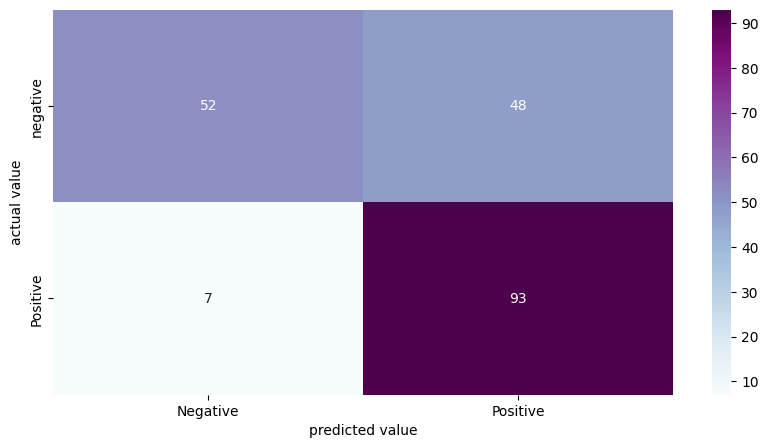

In [ ]:

plt.figure(figsize = (10, 5))
sns.heatmap(cm, annot = True, cmap = "BuPu", xticklabels = ['Negative', 'Positive'], yticklabels = ['negative', 'Positive'])
plt.xlabel('predicted value')
plt.ylabel('actual value')

Text(45.722222222222214, 0.5, 'actual value')

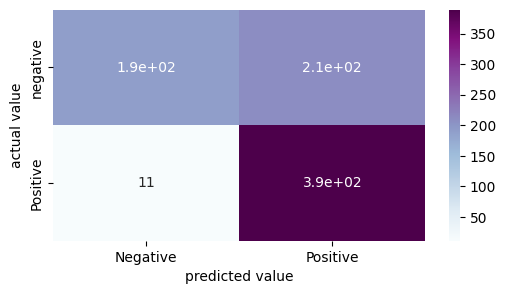

In [ ]:
plt.figure(figsize = (6, 3))
sns.heatmap(cm_train, annot = True, cmap = "BuPu", xticklabels = ['Negative', 'Positive'], yticklabels = ['negative', 'Positive'])
plt.xlabel('predicted value')
plt.ylabel('actual value')